In [17]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-29 07:16:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  18.2MB/s    in 27s     

2020-07-29 07:16:55 (11.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [27]:
base_dir = '/tmp/rockpaperscissors'
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
rock_dir = os.path.join(base_dir, 'rock')

In [30]:
num_paper = len(os.listdir(paper_dir))
num_scissors = len(os.listdir(scissors_dir))
num_rock = len(os.listdir(rock_dir))

In [36]:
num_paper_tr = int(num_paper * 0.6)
num_scissors_tr = int(num_scissors * 0.6)
num_rock_tr = int(num_rock * 0.6)

In [54]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

paper_tr_dir = os.path.join(train_dir,'paper')
scissors_tr_dir = os.path.join(train_dir,'scissors')
rock_tr_dir = os.path.join(train_dir,'rock')

paper_val_dir = os.path.join(val_dir,'paper')
scissors_val_dir = os.path.join(val_dir,'scissors')
rock_val_dir = os.path.join(val_dir,'rock')

In [55]:
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(val_dir):
  os.mkdir(val_dir)

if not os.path.exists(paper_tr_dir):
  os.mkdir(paper_tr_dir)
if not os.path.exists(scissors_tr_dir):
  os.mkdir(scissors_tr_dir)
if not os.path.exists(rock_tr_dir):
  os.mkdir(rock_tr_dir)

if not os.path.exists(paper_val_dir):
  os.mkdir(paper_val_dir)
if not os.path.exists(scissors_val_dir):
  os.mkdir(scissors_val_dir)
if not os.path.exists(rock_val_dir):
  os.mkdir(rock_val_dir)

In [71]:
paper_list = os.listdir(paper_dir)
for x in range(num_paper):
  if (x < num_paper_tr):
    shutil.copy(os.path.join(paper_dir,paper_list[x]), os.path.join(paper_tr_dir,paper_list[x]))
  else:
    shutil.copy(os.path.join(paper_dir,paper_list[x]), os.path.join(paper_val_dir,paper_list[x]))

In [74]:
scissors_list = os.listdir(scissors_dir)
for x in range(num_scissors):
  if (x < num_scissors_tr):
    shutil.copy(os.path.join(scissors_dir,scissors_list[x]), os.path.join(scissors_tr_dir,scissors_list[x]))
  else:
    shutil.copy(os.path.join(scissors_dir,scissors_list[x]), os.path.join(scissors_val_dir,scissors_list[x]))

In [76]:
rock_list = os.listdir(rock_dir)
for x in range(num_rock):
  if (x < num_rock_tr):
    shutil.copy(os.path.join(rock_dir,rock_list[x]), os.path.join(rock_tr_dir,rock_list[x]))
  else:
    shutil.copy(os.path.join(rock_dir,rock_list[x]), os.path.join(rock_val_dir,rock_list[x]))

In [77]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [78]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [96]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [102]:
model.fit(
      train_generator,
      steps_per_epoch=15,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=18,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/18
15/15 - 4s - loss: 0.1040 - accuracy: 0.9833 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 2/18
15/15 - 4s - loss: 0.2199 - accuracy: 0.9167 - val_loss: 0.0899 - val_accuracy: 1.0000
Epoch 3/18
15/15 - 4s - loss: 0.2054 - accuracy: 0.9167 - val_loss: 0.0971 - val_accuracy: 0.9500
Epoch 4/18
15/15 - 4s - loss: 0.1764 - accuracy: 0.9333 - val_loss: 0.3161 - val_accuracy: 0.9000
Epoch 5/18
15/15 - 4s - loss: 0.0743 - accuracy: 0.9667 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 6/18
15/15 - 4s - loss: 0.1434 - accuracy: 0.9500 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 7/18
15/15 - 4s - loss: 0.0592 - accuracy: 0.9833 - val_loss: 0.1039 - val_accuracy: 0.9500
Epoch 8/18
15/15 - 4s - loss: 0.3383 - accuracy: 0.9000 - val_loss: 0.2681 - val_accuracy: 0.9000
Epoch 9/18
15/15 - 4s - loss: 0.1658 - accuracy: 0.9500 - val_loss: 0.2009 - val_accuracy: 0.9500
Epoch 10/18
15/15 - 4s - loss: 0.2009 - accuracy: 0.9333 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 11/18
15/15 -

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
scissors


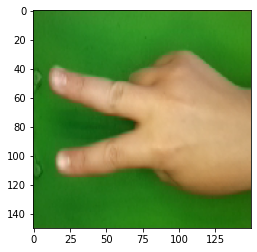

In [103]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')